In [1]:
# %pip install -r requirements.txt

from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime
import pandas as pd
import image_patches
import cv2


DATASET_ROOT="./datasets/"

# DATASET_NAME = "Flickr2K"
DATASET_NAME = "Set5"

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
image_patches.create_valid_image_patches(f"{DATASET_ROOT}/{DATASET_NAME}", (33, 33, 3), f"{DATASET_ROOT}/{DATASET_NAME}_train", 100)
# image_patches.create_image_patches(f"{DATASET_ROOT}/{DATASET_NAME}", (33, 33, 3), f"{DATASET_ROOT}/{DATASET_NAME}_validation", 25)

100%|██████████| 5/5 [00:00<00:00, 41.58it/s]


In [17]:
files = os.listdir(f"{DATASET_ROOT}/{DATASET_NAME}_train/patches/head_patch")
len(files)

41

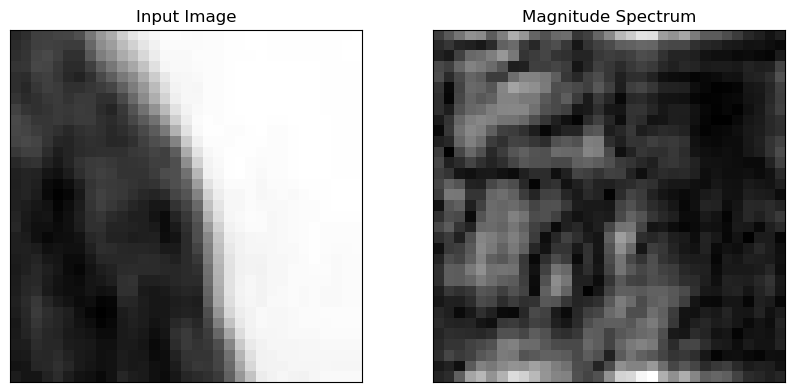

In [3]:
import numpy as np
from matplotlib import pyplot as plt
 
# read the input image
# you can specify the path to image
image_path = f"{DATASET_ROOT}/{DATASET_NAME}_train/patches/baby_patch/patch_2.png"
# image_path = f"{DATASET_ROOT}/{DATASET_NAME}/baby.png"
image = cv2.imread(image_path, 0)
 
# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# # reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = image.shape
center_row, center_col = row // 2, col // 2
 
# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1
 
# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)
 
# # calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])
 
# # visualize the original image and the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
np_image = np.array(imageThen)
np.mean(np_image)
# Convert PIL image to numpy array
image_np = np.array(image)

# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image_np), flags=cv2.DFT_COMPLEX_OUTPUT)


NameError: name 'imageThen' is not defined

In [5]:
## Olhando os valores acima, se tem features, a media acima é mt maior do q se nao tiver

In [6]:
image_path = f"{DATASET_ROOT}/{DATASET_NAME}_train/patches/baby_patch/patch_2.png"
# image_path = f"{DATASET_ROOT}/{DATASET_NAME}/baby.png"
image = Image.open(image_path).convert('L')  # Open the image and convert to grayscale
print(image)

DFT = cv2.dft(np.float32(image_np), flags=cv2.DFT_COMPLEX_OUTPUT)


<PIL.Image.Image image mode=L size=33x33 at 0x1753D59C0>


NameError: name 'image_np' is not defined

(33, 33)


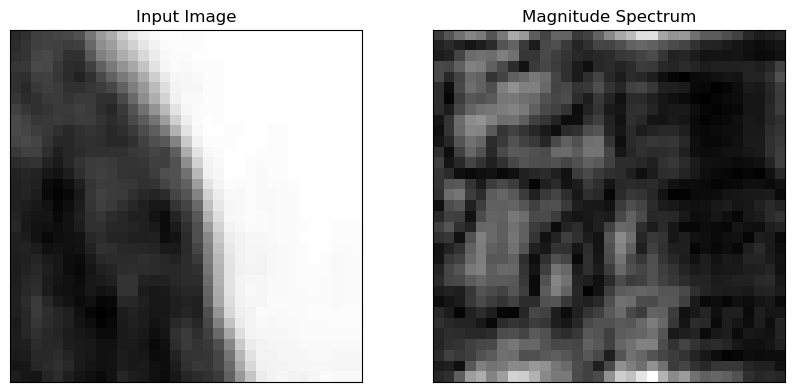

In [3]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# read the input image
# you can specify the path to image
image_path = f"{DATASET_ROOT}/{DATASET_NAME}_train/patches/baby_patch/patch_2.png"
# image_path = f"{DATASET_ROOT}/{DATASET_NAME}/baby.png"
image = Image.open(image_path).convert('L')  # Open the image and convert to grayscale

# Convert PIL image to numpy array
image_np = np.array(image)

print(image_np.shape)

# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image_np), flags=cv2.DFT_COMPLEX_OUTPUT)

# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = image_np.shape
center_row, center_col = row // 2, col // 2

# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1

# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)

# calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:, :, 0], imageThen[:, :, 1])

# visualize the original image and the magnitude spectrum
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(image_np, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [10]:
np_image = np.array(imageThen)
np.mean(np_image)

3038.3333

In [3]:
new_image = Image.open(f"{DATASET_ROOT}/Flickr2K/000400.png")

In [4]:
image_path = f"{DATASET_ROOT}/{DATASET_NAME}_train/patches/baby_patch/patch_2.png"
# image_path = f"{DATASET_ROOT}/{DATASET_NAME}/baby.png"
image = Image.open(image_path).convert('L')  # Open the image and convert to grayscale

image.shape

# Convert PIL image to numpy array
image_np = np.array(image)

print(image_np.shape)

print(type(image))

# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image_np), flags=cv2.DFT_COMPLEX_OUTPUT)

AttributeError: shape